In [1]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from testing import *

In [22]:
periods=1000
dummy_data=pd.DataFrame(data={'a':[np.random.normal(0,1) for _ in range(periods)], 'b':[np.random.normal(0,1) for _ in range(periods)],'c':[np.random.normal(0,1) for _ in range(periods)]},index=[x for x in range(periods)])
dummy_series=pd.Series([np.random.normal(x/100,2) for x in range(periods)])
dummy_assets=pd.DataFrame(data={'Gold':[np.random.normal(0,.01) for _ in range(periods)], 'Silver':[np.random.normal(0,.1) for _ in range(periods)],'Platinum':[np.random.normal(0,.5) for _ in range(periods)]},index=[x for x in range(periods)])

first we make some dummy_data to "train" our hmm model on, and a dummy_series to compare it to

In [16]:
hmm_model = GaussianHMM(
        n_components=4, covariance_type="full", n_iter=1000
    ).fit(dummy_data)

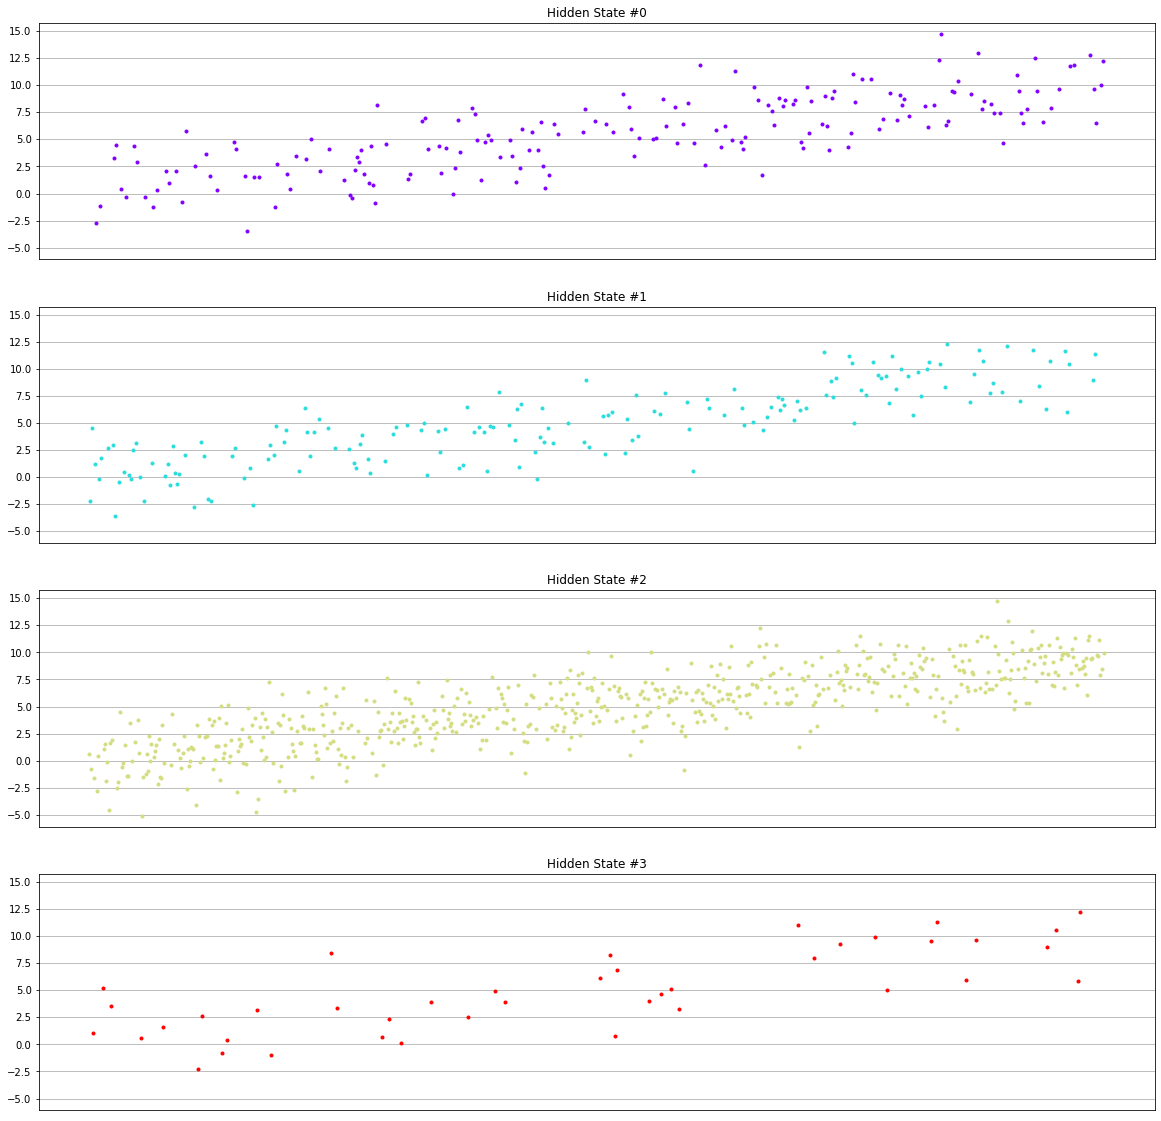

In [17]:
plot_in_sample_hidden_states(hmm_model,dummy_data,dummy_series)

The plot_in_sample_hidden_states function can be used to show which values of a particular series correspond to a particular predicted hidden state. It is a modified version of code taken from https://www.quantstart.com/articles/market-regime-detection-using-hidden-markov-models-in-qstrader/?fbclid=IwAR376CyUIFWzxT28HMHnzHz5AFqfvWDTHEz_WlCiDHRcJ-ULHGXpCOH644g

In [23]:
def strat(row):
    return 1
MarkovStrategy(strat,pd.Series([1+np.random.normal(0,.05) for x in range(periods)]),'Platinum')

1.0490618584145697 Platinum

the MarkovStrategy class is a way of keeping track of various trading strategies, as well as providing ordering methods to sort them by total returns

In [27]:
test_model_mapping(dummy_data,dummy_assets, model=GaussianHMM,n_components=3,train_size=500,begin_date=800)

[1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.5436651066450655 Silver,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0332254225593767 Gold,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 1.0 Gold,
 1.0 Silver,
 1.0 Platinum,
 0.9480373009376075 Gold,
 0.9480373009376075 Gold,
 0.9480373009376075 Gold,
 0.9480373009376075 Gold,
 0.9480373009376075 Gold,
 0.9480373009376075 Gold,
 0.9480

This gets us a list of all the possible trading strategies, represented with the MarkovStrategy class evaluated on all the possible assets, sorted in order of profitability over the course of the testing period.